## An AI-guided invariant signature places MIS-C with Kawasaki disease in a continuum of host immune responses

Debashis Sahoo, Gajanan D. Katkar, Chisato Shimizu, Jihoon Kim, Soni Khandelwal,
Adriana H. Tremoulet, John Kanegaye, Joseph Bocchini, Soumita Das, and Jane C. Burns, Pradipta
Ghosh, Pediatric Emergency Medicine Kawasaki Disease Research Group

<a href="https://pubmed.ncbi.nlm.nih.gov/33880476/"> bioRxiv. 2021 Apr 12;2021.04.11.439347. doi: 10.1101/2021.04.11.439347. Preprint </a>


In [1]:
# IMPORT STATEMENTS
import re
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon")
sys.path.append("../")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']
try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def getPDF(cfile):
    from matplotlib.backends.backend_pdf import PdfPages
    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Debashis Sahoo'
    d['Subject'] = "Covid-19"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 6, 19)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

## ViP and sViP signature

In [2]:
import bone
reload(bone)
class KDAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def getJaitovich2020(self, tn=1, tb=0):
        self.prepareDataDf("COV274")
        atype = self.getSurvName('c disease state')
        atypes = ['C', 'CoV']
        ahash = {'COVID-19':1, 'non-COVID-19':0}
        self.initData(atype, atypes, ahash)

    def getBurns2020KDMISCIII(self, tn=1):
        self.prepareDataDf("COV257.5")
        atype = self.getSurvName('c zworstever')
        zval = ['Z', 'c Z']
        for i in atype[2:]:
            if i == '' or i == 'na':
                zval.append(0)
            elif float(i) < 2:
                zval.append(1)
            elif float(i) >= 2.5 and float(i) < 10:
                zval.append(2)
            elif float(i) >= 10:
                zval.append(4)
            else:
                zval.append(0)
        iday = self.getSurvName("c illday")
        idval = ['i', 'c i']
        for i in iday[2:]:
            if i == '' or i == 'na':
                idval.append(0)
            elif float(i) <= 10:
                idval.append(1)
            elif float(i) > 10:
                idval.append(2)
            else:
                idval.append(0)
        atype = self.getSurvName('c batch')
        ahash = {'statin KD WB':2, 'MIS-C_UCSD':3, 'iLess10':0, 'UCL':1, '':4}
        bval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.getSurvName('c Treatment with statin')
        ahash = {'No':0, 'Yes':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.getSurvName('c Disease_stage')
        ahash = {'Acute ':2, 'Subacute':1, 'Acute':2, 'Convalescent':0,
                'Acute (Label changed)':2, '':3}
        dval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.getSurvName('c Diagnosis')
        atypes = ['K', 'M', 'FC']
        ahash = {'KD':0, 'MIS-C':1, '':0, 'FC':2}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atypes = ['K', 'M', 'D']
            atype = [atype[i] if tval[i] == 0
                    else None for i in range(len(atype))]
            atype = ['D' if str(self.headers[i]) == 'S204026'
                    else atype[i] for i in range(len(atype))]
        if (tn == 3):
            atypes = ['K', 'M']
            atype = [atype[i] if tval[i] == 0
                    else None for i in range(len(atype))]
            atype = [None if str(self.headers[i]) == 'S204026'
                    else atype[i] for i in range(len(atype))]
        if (tn == 4):
            atypes = ['CV', 'SA', 'AV', 'M', 'FC']
            atype = ['CV' if dval[i] == 0 and aval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['SA' if dval[i] == 1 and aval[i] == 0 and tval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and aval[i] == 0 and bval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['M' if aval[i] == 1
                    else atype[i] for i in range(len(atype))]
            atype = ['FC' if aval[i] == 2
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        if (tn == 5):
            atypes = ['CAA-', 'CAA+']
            atype = self.getSurvName('c CAA_pos_neg')
            ahash = {'pos':1, 'neg':0}
        if (tn == 6):
            atypes = ['CV', 'CAA-', 'CAA+S', 'CAA+G']
            btype = self.getSurvName("c CA status")
            atype = self.getSurvName('c Disease_stage')
            ahash = {'Acute ':2, 'Subacute':1, 'Acute':2, 'Convalescent':0,
                    'Acute (Label changed)':2, '':3}
            aval = [ahash[i] if i in ahash else None for i in atype]
            ahash = {'4':4, '3':3, '2':2, '1':1, '':-1, 'na': -1}
            atype = [ahash[btype[i]] if aval[i] == 2
                    else atype[i] for i in range(len(atype))]
            ahash = {'Convalescent':0, 'Subacute':1, 'Acute (Label changed)':1,
                    'Acute':1, 'Acute ':1, 0:0, 1:1, 2:2, 4:3}
        if (tn == 7):
            atypes = ['CV', 'AV']
            atype = ['CV' if dval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and bval[i] == 0
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        if (tn == 8):
            atypes = ['SA', 'AV']
            atype = ['SA' if dval[i] == 1 and tval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and tval[i] is not None and aval[i] == 0
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        if (tn == 9):
            atypes = ['SA', 'AV', 'ST', 'M']
            atype = ['SA' if dval[i] == 1 and tval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and tval[i] is not None and aval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['ST' if dval[i] == 1 and tval[i] == 1 and aval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['M' if aval[i] == 1
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        if (tn == 10):
            atypes = ['CV', 'CAA-', 'CAA+S', 'CAA+G']
            atype = self.getSurvName('c Disease_stage')
            ahash = {'Acute ':2, 'Subacute':1, 'Acute':2, 'Convalescent':0,
                    'Acute (Label changed)':2, '':3}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = [zval[i] if aval[i] == 2 and idval[i] == 1 and bval[i] == 0
                    else atype[i] for i in range(len(atype))]
            ahash = {'Convalescent':0, 1:1, 2:2, 4:3}
        if (tn == 11):
            atypes = ['SA', 'AV', 'M']
            atype = ['SA' if dval[i] == 1 and tval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and tval[i] is not None
                    else atype[i] for i in range(len(atype))]
            atype = ['M' if aval[i] == 1
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        if (tn == 12):
            atypes = ['SA', 'AV', 'M']
            atype = ['SA' if dval[i] == 1 and tval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and tval[i] is not None
                    else atype[i] for i in range(len(atype))]
            atype = ['M' if aval[i] == 1
                    else atype[i] for i in range(len(atype))]
            atype = [None if str(self.headers[i]) == 'S204026'
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        if (tn == 13):
            atypes = ['K', 'M']
            atype = ['K' if dval[i] == 2 and tval[i] is not None
                    else atype[i] for i in range(len(atype))]
            atype = ['M' if aval[i] == 1
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        if (tn == 14):
            atypes = ['CAA+S', 'CAA+G']
            atype = self.getSurvName('c Disease_stage')
            ahash = {'Acute ':2, 'Subacute':1, 'Acute':2, 'Convalescent':0,
                    'Acute (Label changed)':2, '':3}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = [zval[i] if aval[i] == 2 and idval[i] == 1 and bval[i] == 0
                    else atype[i] for i in range(len(atype))]
            ahash = {2:0, 4:1}
        if (tn == 15):
            atypes = ['SA', 'AV', 'M', 'FC']
            atype = ['SA' if dval[i] == 1 and tval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and aval[i] == 0 and bval[i] == 0
                    else atype[i] for i in range(len(atype))]
            atype = ['AV' if dval[i] == 2 and tval[i] is not None
                    else atype[i] for i in range(len(atype))]
            atype = ['M' if aval[i] == 1
                    else atype[i] for i in range(len(atype))]
            atype = ['FC' if aval[i] == 2
                    else atype[i] for i in range(len(atype))]
            ahash = {}
        self.initData(atype, atypes, ahash)

def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def processDataDf(ana, l1, wt1, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def getSViP():
    l1 = [bone.readList("../covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("../covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

Burns 2020 kdmisc combat (n = 200)
Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257.5
136 [31, 105] Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257.5 COV257.5
[162]
ROC-AUC 0.74
[-108.09138622042009, 91.91483988505085, -108.59138622042009, -107.59138622042009]
8.250366259127809 -108.09138622042009
Burns 2020 kdmisc combat (n = 200)
Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257.5
136 [31, 105] Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257.5 COV257.5
[18]
ROC-AUC 0.91
[-5.435974207217762, 72.04881690397465, -5.935974207217762, -4.935974207217762]
0.9143049322549619 -5.435974207217762
Burns 2020 kdmisc combat (n = 200)
Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257.5
15 [5, 10] Burns http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV257.5 COV257.5
[162]
ROC-AUC 0.74
[-100.96478883537782, 12.23553978549014, -101.46478883537782, -100.46478883537782]
8.250366259127809 -100.96478883

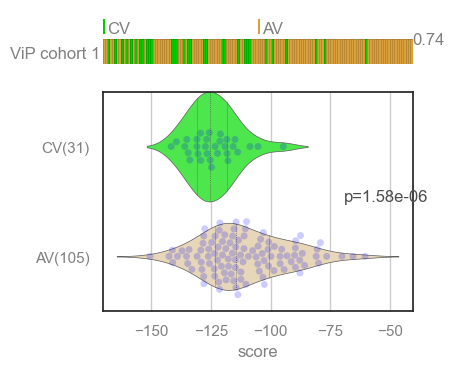

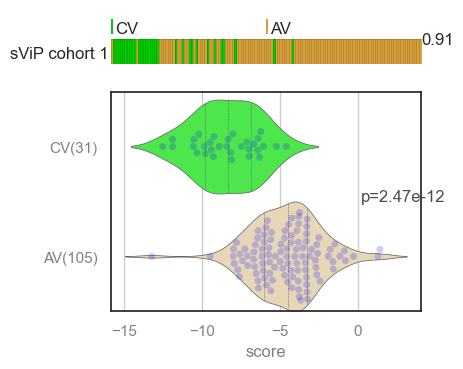

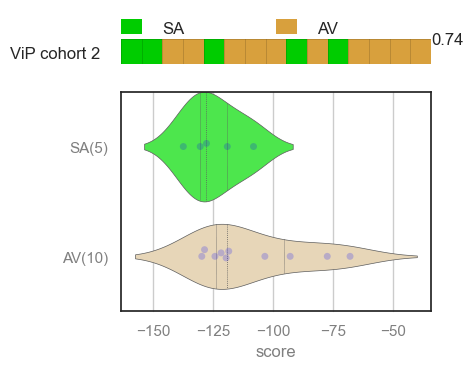

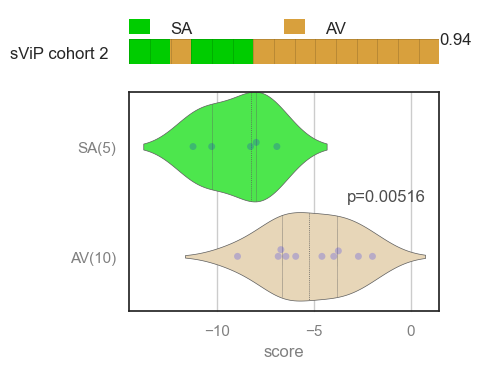

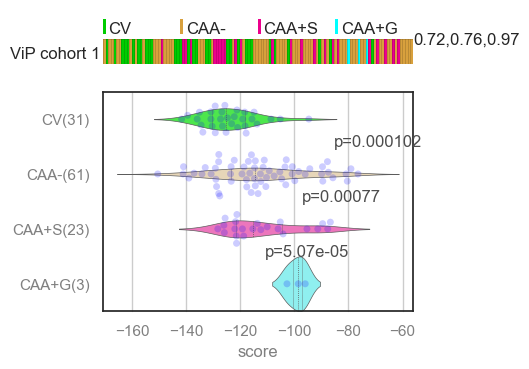

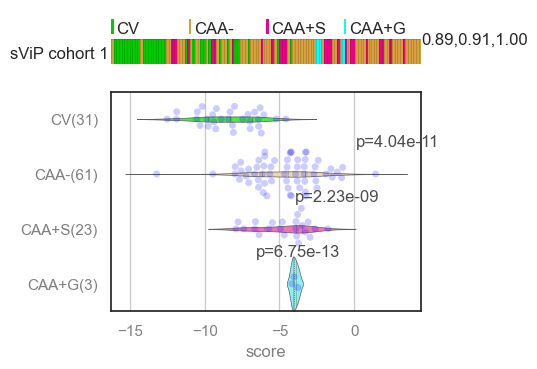

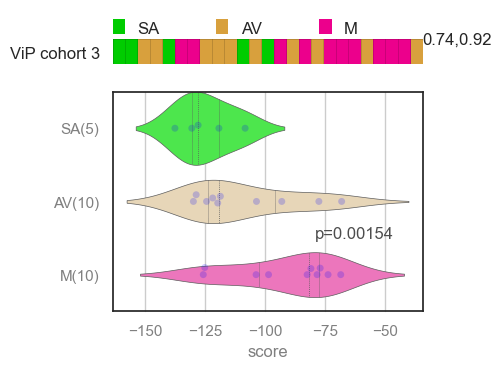

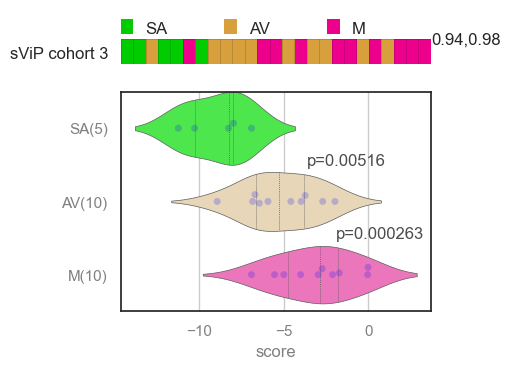

In [3]:
pdf = getPDF("kd-misc-figures.pdf")
bone.setPlotStyle()

def plotViPsViP(n1, pdf, desc):
    wt1, l1 = getViP()
    ana = KDAnalysis()
    ana.getBurns2020KDMISCIII(n1)
    fig = processDataDf(ana, l1, wt1, 'ViP ' + desc)
    pdf.savefig(fig, transparent=True)

    wt1, l1 = getSViP()
    ana = KDAnalysis()
    ana.getBurns2020KDMISCIII(n1)
    fig = processDataDf(ana, l1, wt1, 'sViP ' + desc)
    pdf.savefig(fig, transparent=True)

plotViPsViP(7, pdf, 'cohort 1')
plotViPsViP(8, pdf, 'cohort 2')
plotViPsViP(10, pdf, 'cohort 1')
plotViPsViP(11, pdf, 'cohort 3')

closePDF(pdf)

In [4]:
atype = hu.getHegemonPatientData("COV257.5", 'c illday')[1]
#atype = [re.sub("h.*", "", str(k)) for k in atype]
hu.uniq(atype)

['40',
 'c illday',
 '7',
 '23',
 '4',
 '17',
 '22',
 '5',
 '20',
 '25',
 '8',
 '3',
 '21',
 '19',
 '2',
 '',
 '10',
 '9',
 '6']

In [5]:
import lifelines
lifelines.__version__

'0.22.8'